In [2]:
#@title { run: "auto" }
from IPython.display import HTML

HTML('<a target="_blank" href="https://colab.research.google.com/github/hoffman-lab/Ensemble-Representational-Space/blob/main/manifold_learning.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>')

In [ ]:
#@title Installation and Data Download


!pip install umap-learn

!pip install --pre 'cebra[datasets,demos]'

import numpy as np
from umap import UMAP
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Destination file path
destination = '/content/data.zip'  # Change 'filename.extension' to your desired file name and extension

# Using gdown to download the file
import gdown
file_id = '1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d'
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)



!unzip data.zip -d binned_spike

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Downloading...
From (original): https://drive.google.com/uc?id=1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d
From (redirected): https://drive.google.com/uc?id=1dLP8XP6isjj7jrsM7lKY7CvjvZ06yJ6d&confirm=t&uuid=210a2289-24cc-49d7-ad78-438d2de3c500
To: /content/data.zip
100%|██████████| 10.5M/10.5M [00:00<00:00, 33.8MB/s]


Archive:  data.zip
  inflating: binned_spike/th_bh_100.npy  
  inflating: binned_spike/th_bh_500.npy  
  inflating: binned_spike/th_gaussians_100.npy  
  inflating: binned_spike/th_gaussians_500.npy  



[PCA](https://setosa.io/ev/principal-component-analysis/)

In [ ]:
#@title  Item in Context Task for Freely Moving Macaque [Details](https://www.biorxiv.org/content/10.1101/2023.12.11.571113v1){ run: "auto" }
##@title
from IPython.display import HTML

html_code = """
<video width="640" height="360" controls>
  <source src="https://raw.githubusercontent.com/hoffman-lab/Ensemble-Representational-Space/main/asset/monkey_movement.mp4" type="video/mp4">
</video>
"""
display(HTML(html_code))


# Task

![](https://raw.githubusercontent.com/hoffman-lab/Ensemble-Representational-Space/main/asset/Task.png)

# Task Variable

## Epoch

![](https://raw.githubusercontent.com/hoffman-lab/Ensemble-Representational-Space/main/asset/epoch_sketch.png)


##Trial
![](https://raw.githubusercontent.com/hoffman-lab/Ensemble-Representational-Space/main/asset/trial_sketch.png)


# Large Ensemble Wireless Recording [Details](https://www.biorxiv.org/content/10.1101/2023.12.06.570369v2)
![](https://raw.githubusercontent.com/hoffman-lab/Ensemble-Representational-Space/main/asset/spike_ensemble.png)





# Set Data

In [ ]:
# @title

bin_size=500
binned_data = np.load(f"/content/binned_spike/th_gaussians_{bin_size}.npy")
behavior_label=np.load(f"/content/binned_spike/th_bh_{bin_size}.npy")

In [ ]:
# @title
filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]
bh_data = behavior_label[:,filter]

In [ ]:
print(f"Number of bins {spike_data.shape[0]}\nNumber of cells {spike_data.shape[1]}  ")

print(f"Number of trials {np.max(bh_data[0,:])}\nUnique Epochs {np.unique(bh_data[1,:])}  ")
print(f"binned data shape: {spike_data.shape}")
print(f"behavior label shape: {bh_data.shape}")


Number of bins 2858
Number of cells 251  
Number of trials 40.0
Unique Epochs [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]  
binned data shape: (2858, 251)
behavior label shape: (4, 2858)


# PCA 3D Dimension Reduction and Visualization


In [ ]:
# Create a 3D scatter plot
reducer =PCA(n_components=3)
embedding = reducer.fit_transform(spike_data)



In [ ]:
#@title { run: "auto" }
color_dropdown = "Epoch" # @param ['Epoch','Trial'] {type:"string"}

bh_color= 0 if color_dropdown == 'Trial' else 1

fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[bh_color,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
         colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the PCA embedding',
                  scene=dict(xaxis_title='PCA 1',
                             yaxis_title='PCA 2',
                             zaxis_title='PCA 3'))

fig.show()

# Why could the PCA be failing to find epoch structure?

[PCA](https://setosa.io/ev/principal-component-analysis/)
---






## Susceptible to noise
## Non-linear DATA


# UMAP 3D Dimension Reduction and Visualization

[Hyper Parameter](https://pair-code.github.io/understanding-umap/)

In [ ]:
# Create a 3D scatter plot
reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = .1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
embedding = reducer.fit_transform(spike_data)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
#@title { run: "auto" }

color_dropdown = "Epoch" # @param ['Trial', 'Epoch'] {type:"string"}

bh_color= 0 if color_dropdown == 'Trial' else 1


fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[bh_color,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()

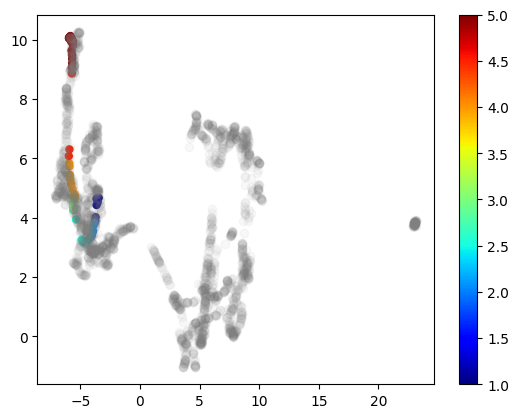

In [ ]:
#@title { run: "auto" }
plt.figure(2)
trial=28 # @param {type:"slider", min:2, max:40, step:1}
toggle_dropdown = "Session" # @param ['Trial','Session']
plot_filter = bh_data[0,:] == trial
plot_embedding = embedding[plot_filter,:]
plot_bh_data = bh_data[:,plot_filter]

sc = plt.scatter(plot_embedding[:,0], plot_embedding[:,1], c=plot_bh_data[1,:], cmap='jet', s=25)
if toggle_dropdown== 'Session':
  plt.scatter(embedding[:,0],embedding[:,1], c='gray', alpha=.05)
plt.colorbar(sc)
plt.show()


# Cell Knockout

In [ ]:
mean_FR=np.mean(binned_data, axis=0)
threshold = np.percentile(mean_FR, 98)

# Get the indices of the top 5% of data
hi_FR_ix = np.where(mean_FR >= threshold)

print(hi_FR_ix, len(hi_FR_ix[0]))


filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]

indices_to_keep = ~np.isin(np.arange(spike_data.shape[1]), hi_FR_ix)

# Use the boolean array to index 'spike_data'
spike_data = spike_data[:,indices_to_keep]


bh_data = behavior_label[:,filter]

reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = 0.1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
embedding = reducer.fit_transform(spike_data)

(array([ 30,  87, 137, 201, 204, 205]),) 6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
# bottom firing set excercise
color_dropdown = "Trial" # @param ['Trial', 'Epoch'] {type:"string"}

bh_color= 0 if color_dropdown == 'Trial' else 1
fig = go.Figure(data=[go.Scatter3d(
    x=embedding[::5, 0],
    y=embedding[::5, 1],
    z=embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[bh_color,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()

# Validation

In [ ]:
filter=np.isin(behavior_label[1,:],[1,1.5,2,2.5, 3,3.5, 4,4.5,5])
spike_data = binned_data[filter,:]
bh_data = behavior_label[:,filter]

In [ ]:
test_filter=bh_data[0,:]==12

In [ ]:
train_spike=spike_data[~test_filter,:]
train_bh=bh_data[:,~test_filter]

test_spike=spike_data[test_filter,:]

test_bh=bh_data[:,test_filter]

In [ ]:
reducer =UMAP(n_components=3,n_neighbors = 10, metric = 'correlation',  learning_rate = 1.0,
                init = 'spectral', min_dist = 0.1, spread = 1.0, repulsion_strength =1.0,
                negative_sample_rate = 5, dens_lambda = 2.0, dens_frac = 0.3,
                dens_var_shift=0.1)
train_embedding = reducer.fit_transform(train_spike)
test_embedding=reducer.transform(test_spike)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:



fig = go.Figure(data=[go.Scatter3d(
    x=train_embedding[::5, 0],
    y=train_embedding[::5, 1],
    z=train_embedding[::5, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=train_bh[1,::5],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.1,
        colorbar=dict(thickness=20)
    )
),
    go.Scatter3d(
    x=test_embedding[:, 0],
    y=test_embedding[:, 1],
    z=test_embedding[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=test_bh[1,:],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.8,
        colorbar=dict(thickness=20)
    )
)])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the UMAP embedding',
                  scene=dict(xaxis_title='UMAP 1',
                             yaxis_title='UMAP 2',
                             zaxis_title='UMAP 3'))

fig.show()



# CEBRA (Optional)

In [ ]:
from cebra import CEBRA

max_iterations=4000
cebra_behavior_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                       hybrid=True,
                        time_offsets=5)

In [ ]:

cebra_behavior_model.fit(spike_data,bh_data[1,:].T)

behavior_pos: -0.3172 behavior_neg:  6.4903 behavior_total:  6.1731 time_pos: -0.9981 time_neg:  6.4903 time_total:  5.4922: 100%|██████████| 4000/4000 [01:42<00:00, 38.99it/s]


CEBRA(batch_size=512, conditional='time_delta', hybrid=True,
      max_iterations=4000, model_architecture='offset10-model',
      output_dimension=3, temperature=1, time_offsets=5, verbose=True)

In [ ]:
cebra_embedding=cebra_behavior_model.transform(spike_data)#

In [ ]:

# 3d plot cebra




fig = go.Figure(data=[go.Scatter3d(
    x=cebra_embedding[:, 0],
    y=cebra_embedding[:, 1],
    z=cebra_embedding[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[0,:],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.5,
        colorbar=dict(thickness=20)
    )
),
  ])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the CEBRA embedding',
                  scene=dict(xaxis_title='CEBRA 1',
                             yaxis_title='CEBRA 2',
                             zaxis_title='CEBRA 3'))

fig.show()



In [ ]:
from cebra import CEBRA

max_iterations=4000
cebra_behavior_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                       hybrid=True,
                        time_offsets=5)

In [ ]:

np.random.shuffle(spike_data)

In [ ]:

spike_data.shape

(2858, 251)

In [ ]:

cebra_behavior_model.fit(spike_data,bh_data[1,:].T)

behavior_pos: -0.7400 behavior_neg:  6.4200 behavior_total:  5.6800 time_pos: -0.8875 time_neg:  6.4200 time_total:  5.5324: 100%|██████████| 4000/4000 [01:47<00:00, 37.23it/s]


CEBRA(batch_size=512, conditional='time_delta', hybrid=True,
      max_iterations=4000, model_architecture='offset10-model',
      output_dimension=3, temperature=1, time_offsets=5, verbose=True)

In [ ]:
cebra_embedding=cebra_behavior_model.transform(spike_data)#

In [ ]:

# 3d plot cebra




fig = go.Figure(data=[go.Scatter3d(
    x=cebra_embedding[:, 0],
    y=cebra_embedding[:, 1],
    z=cebra_embedding[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=bh_data[0,:],  # set color to the target values
        colorscale='jet',  # choose a colorscale
        opacity=0.5,
        colorbar=dict(thickness=20)
    )
),
  ])

# Set the title and labels
fig.update_layout(title='3D Scatter plot of the CEBRA embedding',
                  scene=dict(xaxis_title='CEBRA 1',
                             yaxis_title='CEBRA 2',
                             zaxis_title='CEBRA 3'))

fig.show()

